Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# loading the credit card dataset to a DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [ ]:
# First 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# Dataframe informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking the missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values

In [ ]:
# Distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unbalanced

0 --> Legit Transaction

1 --> Fraudulent transaction

In [ ]:
# Separating legit transaction and fraud transactions
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# Groupby based on mean value
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


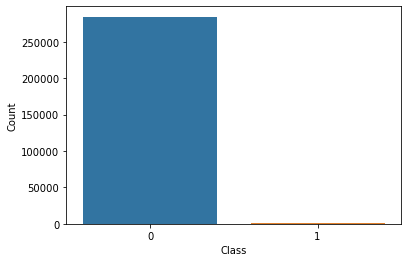

In [ ]:
sns.countplot(x='Class', data=credit_card_data)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Down Sampling

Downsampling the dataset to have normal distribution of Legit transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
legit_sample.shape

(492, 31)

In [ ]:
fraud.shape

(492, 31)

Combining the two dataframes

In [ ]:
final_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
final_dataset.shape

(984, 31)

In [ ]:
final_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
115931,74078.0,1.141087,0.266674,0.655997,1.194964,-0.476144,-0.729799,0.033657,-0.070257,0.050430,...,0.009305,0.061386,0.073744,0.594137,0.388208,-0.442080,0.036928,0.028159,9.99,0
194701,130723.0,-6.709999,-7.137526,1.220637,3.098642,4.708950,-4.041970,-3.694596,1.077245,0.179547,...,0.557416,-1.262369,-0.116927,0.025723,0.255818,-0.698229,0.353033,-1.137615,59.50,0
272942,165344.0,-0.008985,-1.108196,-2.196696,-1.363001,2.616741,-3.123302,-2.420816,-3.437688,-1.384024,...,-0.416936,1.636937,-4.544892,0.415068,-1.172873,-0.190015,0.390432,0.604457,300.00,0
72993,54936.0,-2.067476,0.304393,0.383717,1.366354,1.153337,-0.859009,-0.595338,-0.267743,-1.078789,...,0.928636,0.101165,-0.572820,0.177468,-0.194879,-0.289014,0.350649,-0.289543,1.00,0
60225,49223.0,0.589889,-0.661066,1.336633,2.975239,-0.895898,1.138329,-0.491234,0.416851,0.153080,...,0.246516,0.574192,-0.280078,0.279161,0.407263,0.189728,0.020555,0.053488,218.95,0


In [ ]:
final_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
final_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

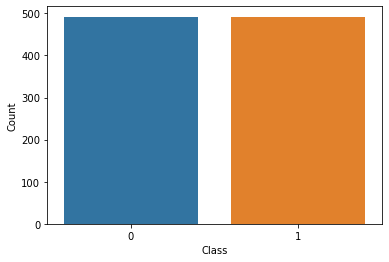

In [ ]:
sns.countplot(x='Class', data=final_dataset)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

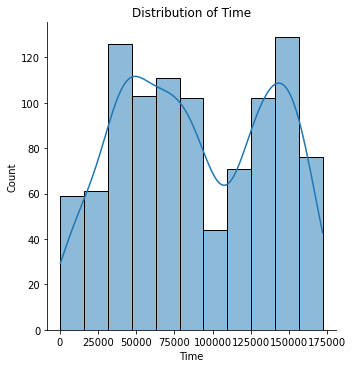

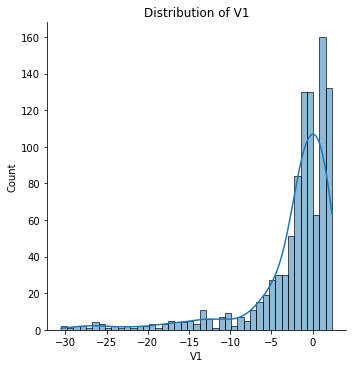

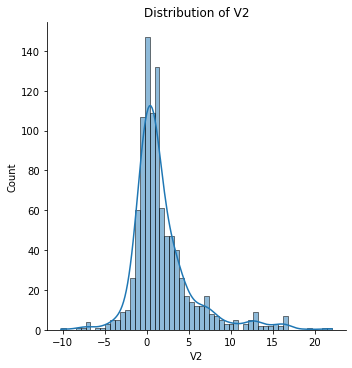

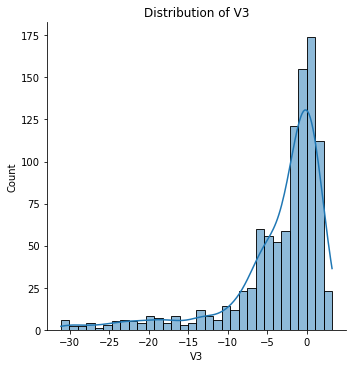

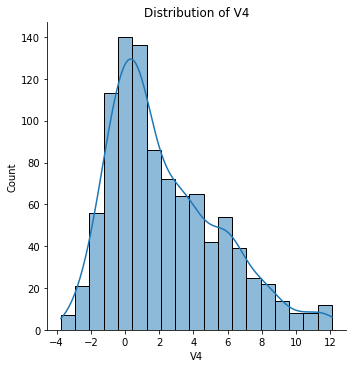

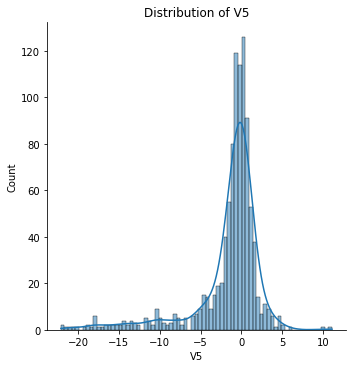

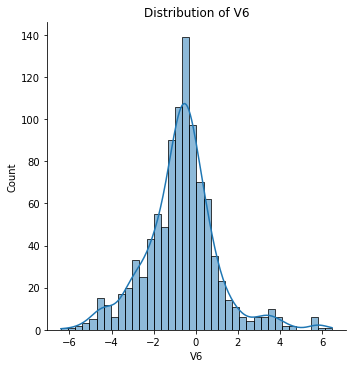

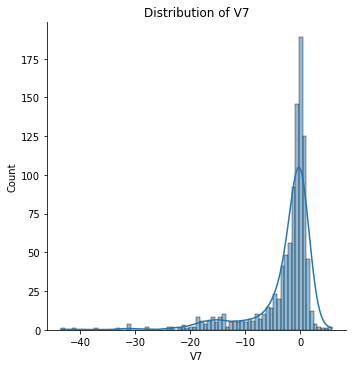

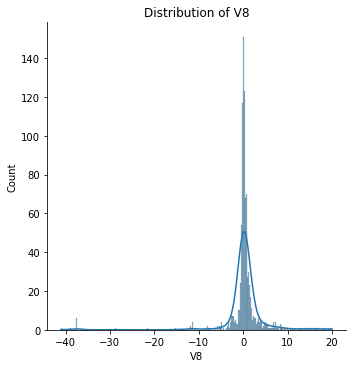

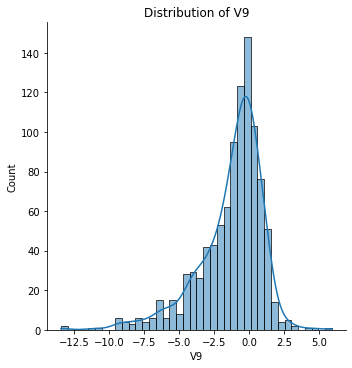

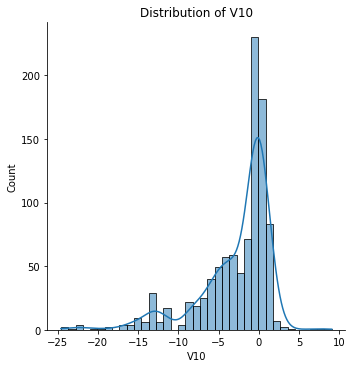

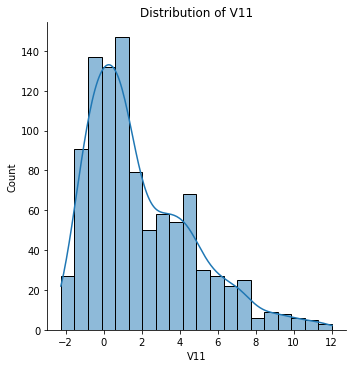

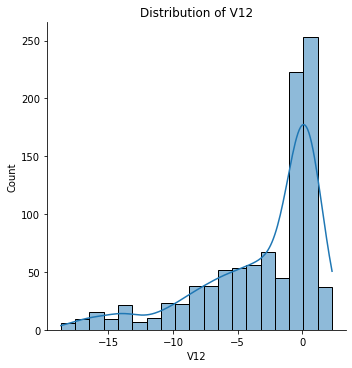

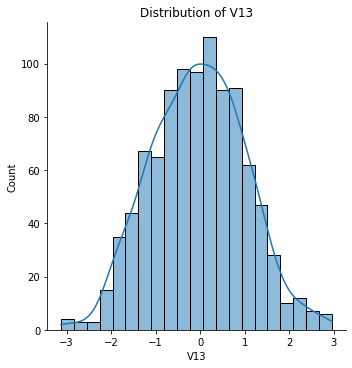

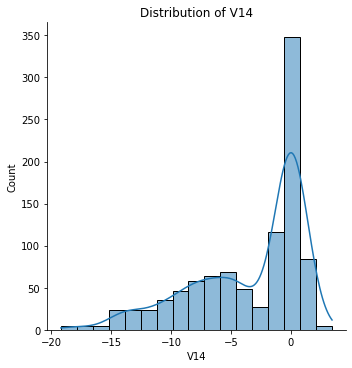

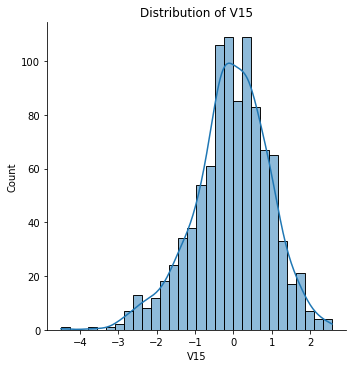

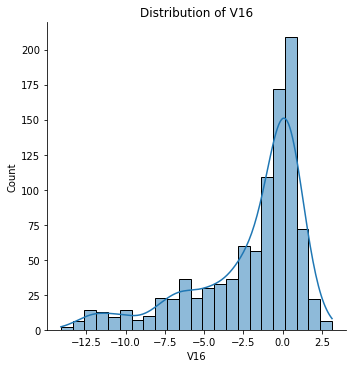

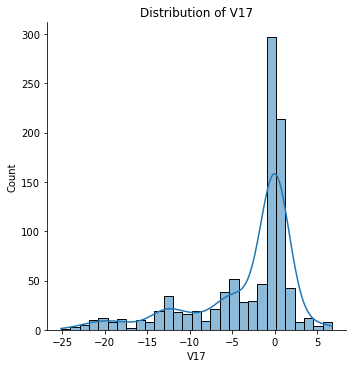

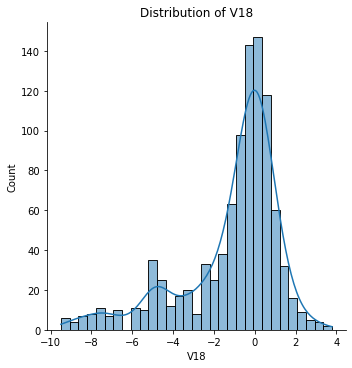

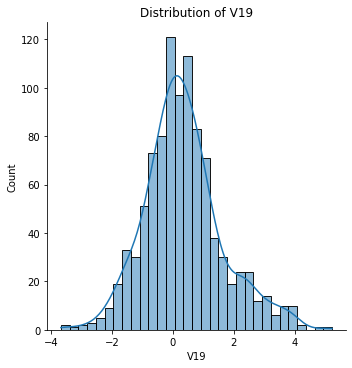

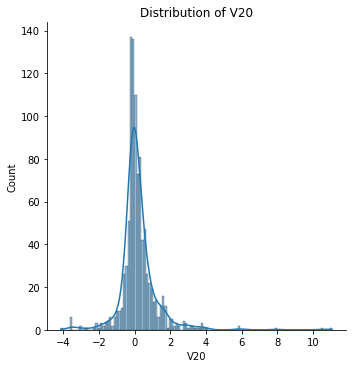

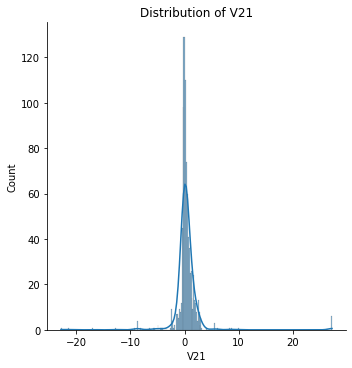

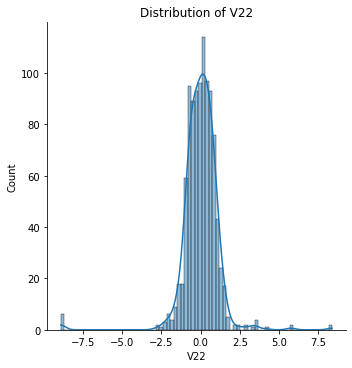

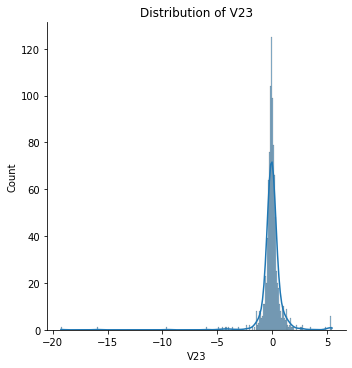

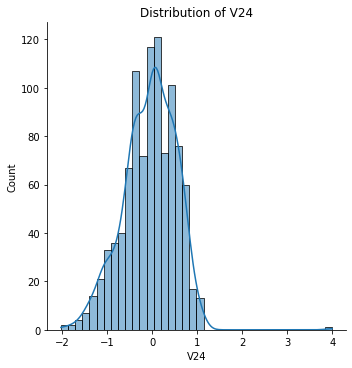

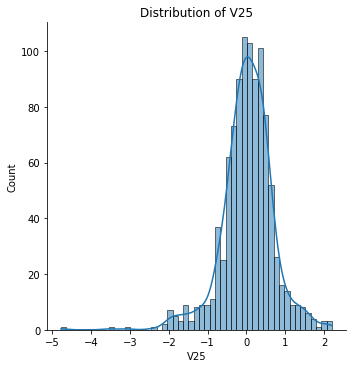

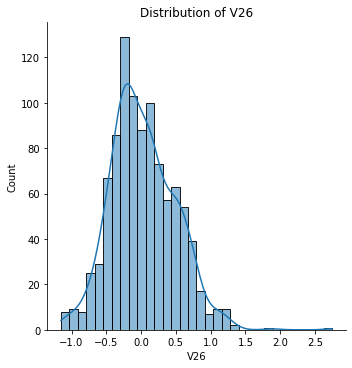

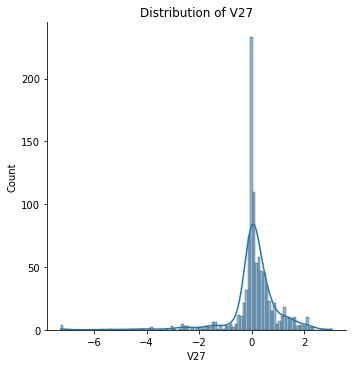

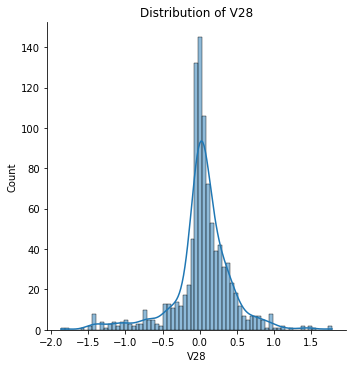

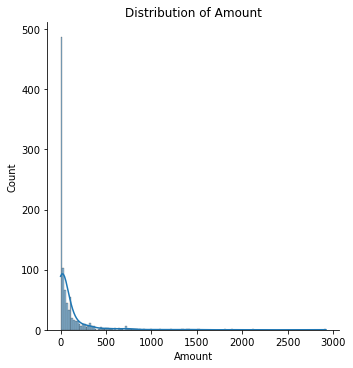

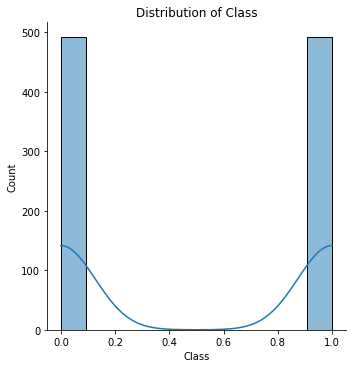

In [ ]:
# Distribution plot of all columns

for column in final_dataset.columns:
    sns.displot(final_dataset[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

Splitting the data into Features & Targets

In [ ]:
X = final_dataset.drop(columns=['Time','Class'], axis=1)
Y = final_dataset['Class']

In [ ]:
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
115931  1.141087  0.266674  0.655997  1.194964 -0.476144 -0.729799  0.033657   
194701 -6.709999 -7.137526  1.220637  3.098642  4.708950 -4.041970 -3.694596   
272942 -0.008985 -1.108196 -2.196696 -1.363001  2.616741 -3.123302 -2.420816   
72993  -2.067476  0.304393  0.383717  1.366354  1.153337 -0.859009 -0.595338   
60225   0.589889 -0.661066  1.336633  2.975239 -0.895898  1.138329 -0.491234   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10  .

In [ ]:
print(Y)

115931    0
194701    0
272942    0
72993     0
60225     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 29) (787, 29) (197, 29)


In [ ]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,...,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000
mean,-2.267050,1.766411,-3.447375,2.275944,-1.515429,-0.706382,-2.717461,0.306792,-1.265290,-2.762487,...,0.199930,0.371722,0.016231,-0.053542,-0.041137,0.023117,0.018837,0.095967,0.044647,107.353202
std,5.430800,3.670613,6.103687,3.149687,4.120564,1.720009,5.710316,4.820692,2.250936,4.464046,...,1.049712,2.760109,1.163700,1.262025,0.576958,0.682164,0.457303,0.985845,0.405790,251.862706
min,-30.552380,-10.202862,-31.103685,-3.753759,-22.105532,-6.406267,-41.506796,-38.987263,-13.434066,-24.403185,...,-4.128186,-21.453736,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000
25%,-2.789009,-0.224021,-5.070364,-0.092255,-1.763489,-1.524705,-3.034402,-0.211697,-2.294867,-4.593671,...,-0.198060,-0.159377,-0.522991,-0.244460,-0.401005,-0.294821,-0.289370,-0.055549,-0.053797,1.610000
50%,-0.758469,0.911624,-1.304527,1.335595,-0.461423,-0.633112,-0.684685,0.136807,-0.694696,-0.823443,...,0.019626,0.156617,0.054126,-0.040137,0.013566,0.056276,-0.026305,0.048087,0.035883,21.350000
75%,1.083129,2.723636,0.294189,4.321988,0.439019,0.108324,0.252231,0.901009,0.156448,0.015385,...,0.444210,0.713733,0.591174,0.188617,0.369662,0.393633,0.323306,0.431245,0.219201,99.990000
max,2.359640,21.467203,3.178966,12.114672,11.095089,6.065901,5.802537,20.007208,5.917176,9.039663,...,10.440718,27.202839,8.361985,5.303607,3.990646,2.208209,2.745261,3.052358,1.779364,2919.920000


Data Standardization

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
check_df = pd.DataFrame(X_train_scaled)

check_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,...,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02,7.870000e+02
mean,4.281483e-17,6.305841e-17,-7.624848e-17,2.059626e-17,3.752469e-17,-6.711418e-17,-1.170883e-17,8.534751e-18,3.722492e-17,6.531553e-17,...,-3.174081e-17,-2.585113e-17,-2.634487e-17,6.101289e-18,-2.849619e-17,1.749271e-17,1.410703e-17,2.073733e-17,4.609471e-17,-3.949968e-17
std,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,...,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00,1.000636e+00
min,-5.211629e+00,-3.262912e+00,-4.533964e+00,-1.915599e+00,-5.000091e+00,-3.315977e+00,-6.797173e+00,-8.156308e+00,-5.409534e+00,-4.850860e+00,...,-4.125769e+00,-7.912491e+00,-7.655678e+00,-1.522394e+01,-3.445917e+00,-7.047838e+00,-2.563405e+00,-7.469866e+00,-4.719574e+00,-4.265080e-01
25%,-9.617208e-02,-5.426063e-01,-2.660721e-01,-7.523619e-01,-6.023881e-02,-4.760695e-01,-5.553852e-02,-1.076235e-01,-4.576904e-01,-4.104681e-01,...,-3.793835e-01,-1.925419e-01,-4.636627e-01,-1.513748e-01,-6.241292e-01,-4.663704e-01,-6.743948e-01,-1.537890e-01,-2.427529e-01,-4.201116e-01
50%,2.779592e-01,-2.330211e-01,3.512976e-01,-2.987430e-01,2.559544e-01,4.262584e-02,3.562095e-01,-3.528407e-02,2.536532e-01,4.346453e-01,...,-1.718744e-01,-7.798300e-02,3.258486e-02,1.062896e-02,9.487344e-02,4.863895e-02,-9.877468e-02,-4.859811e-02,-2.160983e-02,-3.416857e-01
75%,6.172774e-01,2.609467e-01,6.133903e-01,6.500156e-01,4.746173e-01,4.739648e-01,5.203881e-01,1.233421e-01,6.320222e-01,6.226725e-01,...,2.328592e-01,1.239909e-01,4.943794e-01,1.920039e-01,7.124610e-01,5.434932e-01,6.662170e-01,3.403089e-01,4.304324e-01,-2.925357e-02
max,8.524771e-01,5.370580e+00,1.086320e+00,3.125703e+00,3.062333e+00,3.939857e+00,1.492985e+00,4.089236e+00,3.192909e+00,2.645505e+00,...,9.762012e+00,9.727218e+00,7.176303e+00,4.247583e+00,6.992441e+00,3.205216e+00,5.965757e+00,3.000747e+00,4.277635e+00,1.117416e+01


Mean is almost 0

Standard Deviation is 1

Model Training

# Model: Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# Training the Logistic Regression Model with Training Data
model.fit(X_train_scaled, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# Accuracy on training data
X_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9580686149936467


In [ ]:
# Accuracy on testing data
X_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Testing Data : ', test_data_accuracy)

Accuracy score on Testing Data :  0.9390862944162437


Logistic Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 5000]
}

In [ ]:
# Create a logistic regression model
model = LogisticRegression()

In [ ]:
# Create a randomized search cross-validation object
random_search = RandomizedSearchCV(model, hyperparameters, cv=5, n_jobs=-1, random_state=42)

In [ ]:
# Fit the randomized search object to the data
random_search.fit(X_train_scaled, Y_train)

C:\Users\ABHI CHY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ABHI CHY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHI CHY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ABHI CHY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 464, in _check_solver
    raise Value

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 500, 1000, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42)

In [ ]:
# Print the best hyperparameters and corresponding score
print('Best hyperparameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

Best hyperparameters: {'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 1000, 'fit_intercept': True, 'C': 0.01}
Best score: 0.9466500040312826


In [ ]:
# Get the best model
best_model = random_search.best_estimator_

Model Evaluation of best model

In [ ]:
# Accuracy on training data
X_train_prediction = best_model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score on Training data : ', training_data_accuracy)

Accuracy score on Training data :  0.9593392630241423


In [ ]:
# Accuracy on testing data
X_test_prediction = best_model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score on Testing Data : ', test_data_accuracy)

Accuracy score on Testing Data :  0.949238578680203


**Logistic Regression best model = 94.9%**

Precision

Recall

F1 Score

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, X_test_prediction, average='binary')

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.9888888888888889
Recall: 0.9081632653061225
F1 Score: 0.946808510638298


# Model: Random Forest Classifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
# Training the Random Forest Classifier Model with Training Data
model.fit(X_train_scaled, Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [ ]:
# Accuracy on training data
X_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score on Training data : ', training_data_accuracy)

Accuracy score on Training data :  1.0


In [ ]:
# Accuracy on testing data
X_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score on Testing Data : ', test_data_accuracy)

Accuracy score on Testing Data :  0.934010152284264


Random Forest Classifier Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hyperparameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


In [ ]:
# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

In [ ]:
# Create a randomized search cross-validation object
random_search = RandomizedSearchCV(model, hyperparameters, cv=5, n_jobs=-1, random_state=42)

In [ ]:
# Fit the randomized search object to the data
random_search.fit(X_train_scaled, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42)

In [ ]:
# Print the best hyperparameters and corresponding score
print('Best hyperparameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': False}
Best score: 0.9466096912037409


In [ ]:
# Get the best model
best_model = random_search.best_estimator_

Model Evaluation of best model

In [ ]:
# Accuracy on training data
X_train_prediction = best_model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score on Training data : ', training_data_accuracy)

Accuracy score on Training data :  1.0


In [ ]:
# Accuracy on testing data
X_test_prediction = best_model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score on Testing Data : ', test_data_accuracy)

Accuracy score on Testing Data :  0.934010152284264


**Random Forest Classifier best model = 93.4%**

Precision

Recall

F1 Score

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, X_test_prediction, average='binary')

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.9885057471264368
Recall: 0.8775510204081632
F1 Score: 0.9297297297297297


# Model: Neural Network

**Deep Learning**

**Building the Neural Network**

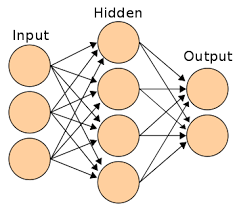

In [ ]:
# Importing tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(29,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
# Compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Meural Network

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
23/23 [==============================] - 1s 8ms/step - loss: 0.5733 - accuracy: 0.6596 - val_loss: 0.4409 - val_accuracy: 0.8354
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4103 - accuracy: 0.8347 - val_loss: 0.3137 - val_accuracy: 0.9494
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8757 - val_loss: 0.2497 - val_accuracy: 0.9241
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3051 - accuracy: 0.8856 - val_loss: 0.2175 - val_accuracy: 0.9367
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2806 - accuracy: 0.8884 - val_loss: 0.1986 - val_accuracy: 0.9494
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2607 - accuracy: 0.8955 - val_loss: 0.1812 - val_accuracy: 0.9494
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2443 - accuracy: 0.9068 - val_loss: 0.1676 - val_accuracy: 0.9620
Epoch 8/10
23/23 [==

Visualizing accuracy and loss

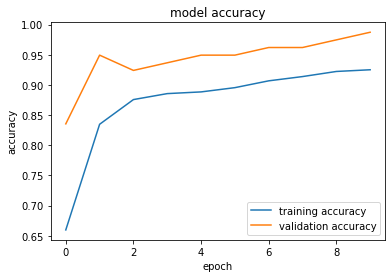

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training accuracy', 'validation accuracy'], loc = 'lower right')
plt.show()

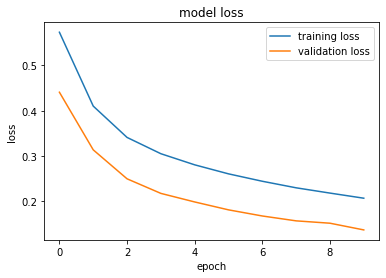

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.show()

Accuracy of the model on test data

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9340
0.9340101480484009


**Hyperparameter Tuning of Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [ ]:
# Defining the Neural Network
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), input_shape=(29,)))
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(10))
    model.add(layers.Activation('softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Define the search space
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory=r'D:\Work\project\my_dir',
    project_name='hp_tuning'
)

INFO:tensorflow:Reloading Tuner from D:\Work\project\my_dir\hp_tuning\tuner0.json


In [ ]:
# Start the search for the best hyperparameters
tuner.search(X_train_scaled, Y_train, epochs=5, validation_data=(X_test_scaled, Y_test))

INFO:tensorflow:Oracle triggered exit


In [ ]:
# Print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'Best hyperparameters: {best_hps}')

Best hyperparameters: <keras_tuner.engine.hyperparameters.hyperparameters.HyperParameters object at 0x00000206460CCD90>


In [ ]:
# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, Y_train, epochs=10, validation_data=(X_test_scaled, Y_test))

Epoch 1/10
25/25 [==============================] - 1s 9ms/step - loss: 0.6159 - accuracy: 0.8412 - val_loss: 0.2303 - val_accuracy: 0.9391
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1924 - accuracy: 0.9403 - val_loss: 0.1769 - val_accuracy: 0.9239
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1486 - accuracy: 0.9517 - val_loss: 0.1612 - val_accuracy: 0.9289
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1402 - accuracy: 0.9492 - val_loss: 0.1550 - val_accuracy: 0.9289
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1324 - accuracy: 0.9555 - val_loss: 0.1681 - val_accuracy: 0.9289
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.9657 - val_loss: 0.1890 - val_accuracy: 0.9340
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1045 - accuracy: 0.9670 - val_loss: 0.2077 - val_accuracy: 0.9340
Epoch 8/10
25/25 [==

Visualizing accuracy and loss

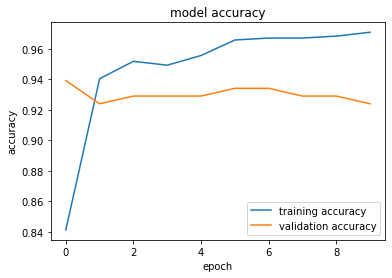

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training accuracy', 'validation accuracy'], loc = 'lower right')
plt.show()

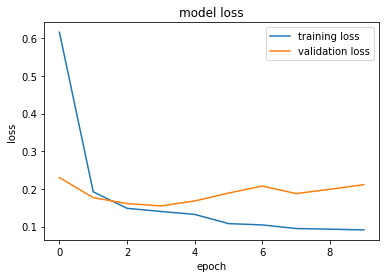

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.show()

Accuracy of the model on test data

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9239
0.9238578677177429


**Neural Network best model = 92.3%**

Precision

Recall

F1 Score

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# Get predictions on the test data
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

7/7 [==============================] - 0s 1ms/step


In [ ]:
# Convert predictions into binary format to find the legit (0) and fraudulent (1) transactions
threshold = 0.5
y_pred = np.where(model.predict(X_test_scaled)[:, 1] >= threshold, 1, 0)

7/7 [==============================] - 0s 2ms/step


In [ ]:
# Precision, recall, and f1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='binary')

In [ ]:
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

Precision: 0.946236559139785
Recall: 0.8979591836734694
F1 score: 0.9214659685863874


# Model Comparison:

Logistic Regression best model accuracy = 94.9%

Random Forest Classifier best model accuracy = 93.4%

Neural Network best model accuracy = 92.3%

# Logistic Regression model provides the highest accuracy (94.9%) for the credit card fraudulent transactions.